#TEAM DETAILS

Team Id:10 <br>
Sem: 4<br>
Div: B<br>
Dept: CSE<br>
Title ID: <br>
Project title: Play Store Applications Performance Analysis<br>
Crisp Problem Statement: Analyze the user interests and trends of Google Play Store applications.<br>
Tearism Leader:<br>
Team Member 1<br>
Name: Mayuri Kalmat<br>
Roll No: 230<br>
Usn: 01FE20BCS095<br>
Team Member 2<br>
Name: Parag Hegde<br>
Roll No: 231<br>
Usn: 01FE20BCS096<br>
Team Member 3<br>
Name: Pranav Jadhav<br>
Roll No: 234<br>
Usn: 01FE20BCS099<br>
Team Member 4<br>
Name: Pranavi Kulkarni<br>
Roll No: 253<br>
Usn: 01FE20BCS118<br>

#Imports

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [228]:
df=pd.read_csv('google_dwnlds.csv')


#Data details before any Preprocessing

In [229]:
df.head(10)

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Frequency,Advertisements,Beta Program,Time Stamp,Date,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2021",1.0.0,4.0.3 and up,57,Yes,No,03:05,8,10
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2021",2.0.0,4.0.3 and up,74,No,Yes,04:05,31,2
2,U Launcher Lite ï¿½ï¿½ï¿½ FREE Live Cool Theme...,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2021",1.2.4,4.0.3 and up,94,Yes,No,05:05,7,6
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2021",Varies with device,4.2 and up,10,Yes,No,06:05,9,11
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2021",1.1,4.4 and up,76,Yes,Yes,07:05,26,4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2020",1,2.3 and up,54,Yes,Yes,08:05,28,4
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2021",1.1,4.0.3 and up,56,No,Yes,09:05,20,8
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2021",6.1.61.1,4.2 and up,53,No,No,10:05,30,3
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2020",2.9.2,3.0 and up,4,Yes,Yes,11:05,2,8
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2021",2.8,4.0.3 and up,77,No,No,12:05,15,5


In [230]:
df.shape

(10841, 19)

Number of Columns: 19<br>
Number of rows: 10841

In [231]:
df.describe()

,Rating,Update Frequency,Date,Month
count,9367.000000,10841.000000,10841.000000,10841.000000
mean,4.193338,50.355687,15.990222,6.516004
std,0.537431,28.676244,8.969624,3.462150
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,26.000000,8.000000,4.000000
50%,4.300000,50.000000,16.000000,6.000000
75%,4.500000,75.000000,24.000000,10.000000
max,19.000000,100.000000,31.000000,12.000000


In [232]:
df.isnull().sum()

App                    0
Category               0
Rating              1474
Reviews                0
Size                   0
Downloads              0
Type                   1
Price                  0
Content Rating         1
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            3
Update Frequency       0
Advertisements         0
Beta Program           0
Time Stamp             0
Date                   0
Month                  0
dtype: int64

In [233]:
df.isnull().sum().sum()

1487

Total Number of null values: 1487

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba0cc0f50>,
      dtype=object)

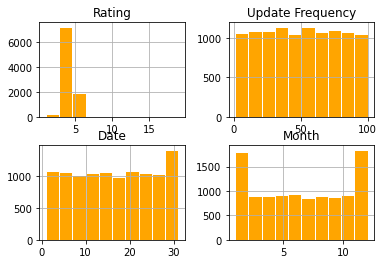

In [234]:
df.hist(color='orange',edgecolor='white')

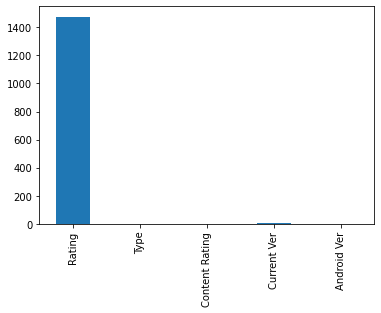

In [235]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

Defining a function to print the datatype, null count, unique count of different attributes(columns) 

In [236]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

In [237]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9657
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6001
Size,object,0,462
Downloads,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


#Data Cleaning

In [238]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Frequency,Advertisements,Beta Program,Time Stamp,Date,Month
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2021",Varies with device,Varies with device,66,No,No,07:05,20,3


Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So now we can fill the missing value with free.



In [239]:
df['Type'].fillna("Free", inplace = True)

In [240]:
df.isnull().sum()

App                    0
Category               0
Rating              1474
Reviews                0
Size                   0
Downloads              0
Type                   0
Price                  0
Content Rating         1
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            3
Update Frequency       0
Advertisements         0
Beta Program           0
Time Stamp             0
Date                   0
Month                  0
dtype: int64

So null value in the column 'Type' has been removed 

We see that there is one null value in the column 

In [241]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Frequency,Advertisements,Beta Program,Time Stamp,Date,Month
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2021",1.0.19,4.0 and up,NaN,95,No,Yes,11:05,7,9


In [242]:
df.dropna(subset = ['Content Rating'], inplace=True)

In [243]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9656
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6000
Size,object,0,461
Downloads,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


There are some unwanted columns like: Current Version, Last Updated, Android version, Beta Program

In [244]:
df.drop(['Current Ver','Last Updated', 'Android Ver','Beta Program'], axis=1, inplace=True)

There are 1474 null values in the column: Rating<br>
So we fix it by entering the mode values of the same.

In [245]:
modeValueRating = df['Rating'].mode()

In [246]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [247]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9656
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6000
Size,object,0,461
Downloads,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now all the null values have been removed.<br>
This means the data does not contain any missing values

#Data Preparation

Columns like Reviews, Size, Downloads, & price should have an int or float datatype. But here we can see of objecttype, So let’s convert them to their respective correct type.

Conversion of Column: 'Reviews' into integer data type

In [248]:
df['Reviews'] = df.Reviews.astype(int)

In [249]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9656
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6000
Size,object,0,461
Downloads,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Removal **'+'** from the **Downloads**






In [250]:
df['Downloads'] = df.Downloads.apply(lambda x: x.strip('+'))

Removal **'M'** from the **Size**

In [251]:
df['Size'] = df.Size.apply(lambda x: x.strip('M'))

Removal **','** from the **Downloads**

In [252]:
df['Downloads']=df["Downloads"].str.replace(",","")

Removal of '**$**' from **Price**

In [253]:
df['Price']=df["Price"].str.replace("$","")

In [254]:
df.head()

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating,Genres,Update Frequency,Advertisements,Time Stamp,Date,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,57,Yes,03:05,8,10
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,74,No,04:05,31,2
2,U Launcher Lite ï¿½ï¿½ï¿½ FREE Live Cool Theme...,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,94,Yes,05:05,7,6
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,10,Yes,06:05,9,11
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,76,Yes,07:05,26,4


Conversion of Column: 'Size' into float data type

In [255]:
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

Conversion of Column: 'Downloads' into float data type

In [256]:
df['Downloads'] = pd.to_numeric(df['Downloads'],errors='coerce')

Conversion of Column: 'Price' into float data type

In [257]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

Finally all the data types are set correct

In [258]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9656
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6000
Size,float64,2011,181
Downloads,int64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [259]:
df.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                2011
Downloads              0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Update Frequency       0
Advertisements         0
Time Stamp             0
Date                   0
Month                  0
dtype: int64

We see after conversion, column Size has 2011 null values

In [260]:
meanValueSize = df['Size'].mean()

In [261]:
df['Size'].fillna(value=meanValueSize, inplace = True)

In [262]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9656
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6000
Size,float64,0,182
Downloads,int64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


Finally the data set is free of null values 

Since the columns Genres and Category almost have the same values we drop the column Genre

In [263]:
df.drop(['Genres'], axis=1, inplace=True)

A run-through through csv tells that there are a lot of duplicate values<br>
So we remove the duplicate applications.

In [264]:
df.drop_duplicates(subset='App', keep="first", inplace=True)

In [265]:
df.shape

(9656, 14)

FInally we have:
No of Rows: 9656
No of Columns:15

Now the dataset is ready for Analysis!

This is the final data information:

In [266]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9656
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,5327
Size,float64,0,182
Downloads,int64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Update Frequency,int64,0,100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba0797a90>,
      dtype=object)

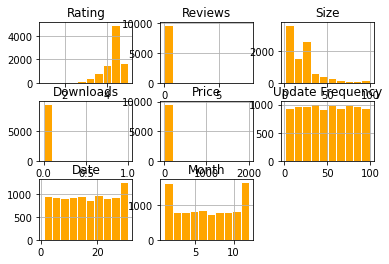

In [267]:
df.hist(color='orange',edgecolor='white')

#Exploratory Data Analysis and Visualisation

**CORRELATION BETWEEN NUMERIC ATTRIBUTES**

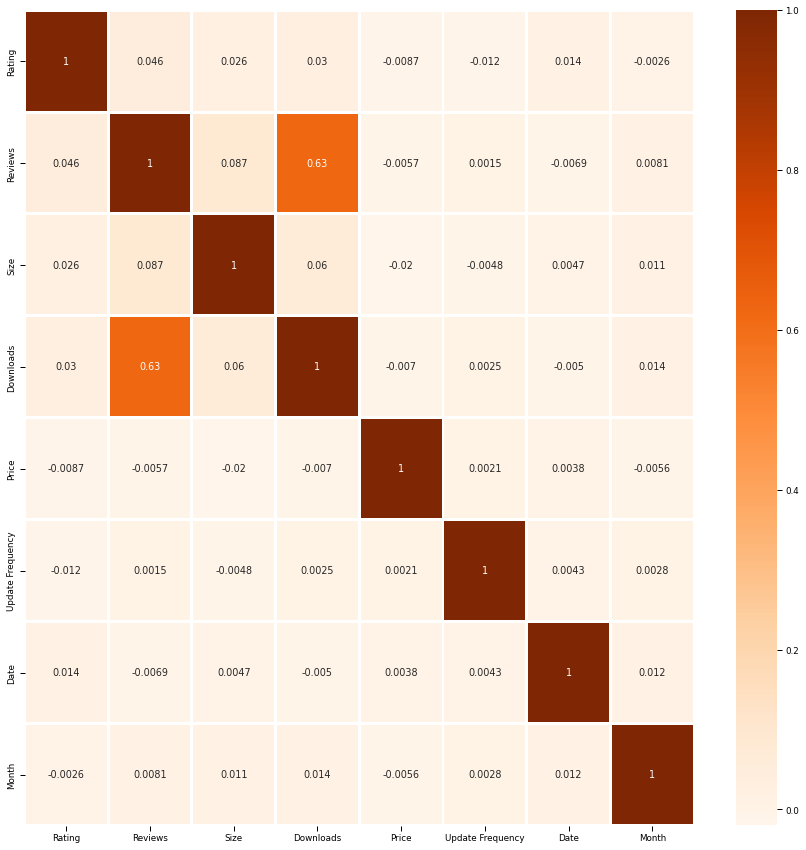

In [297]:
plt.figure(figsize=(15,15))
sns.set_context('paper',font_scale=1)
playStoreAll=df.corr()
playStoreAll
sns.heatmap(playStoreAll,annot=True,cmap='Oranges',linecolor='white',linewidths=2)

**1.To know the count of applications as per their user type.**

In [268]:
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

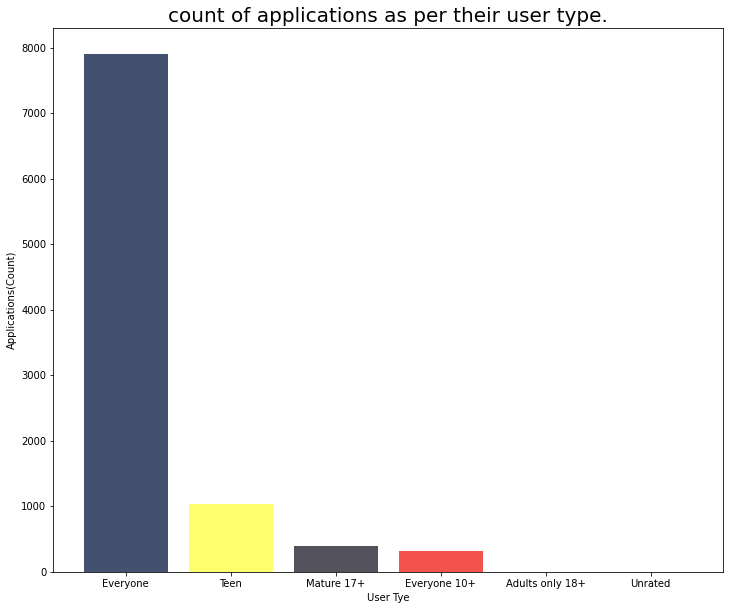

In [269]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('count of applications as per their user type.',size = 20);
plt.ylabel('Applications(Count)');
plt.xlabel('User Tye');
plt.show()

**Inference:**

The applications that are under everyone’s use include music, social media, navigation etc. They are widely used by all and sundry everyday. Hence, there are more number of applications under the user type ‘everyone’. 

**2.Applications with highest earning**

In [270]:
Paid_Apps_df = df[df['Type'] == 'Paid']

In [271]:
earning_df = Paid_Apps_df[['App', 'Downloads', 'Price']]

In [272]:
earning_df['Earnings'] = earning_df['Downloads'] * earning_df['Price'];

In [273]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)

In [274]:
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

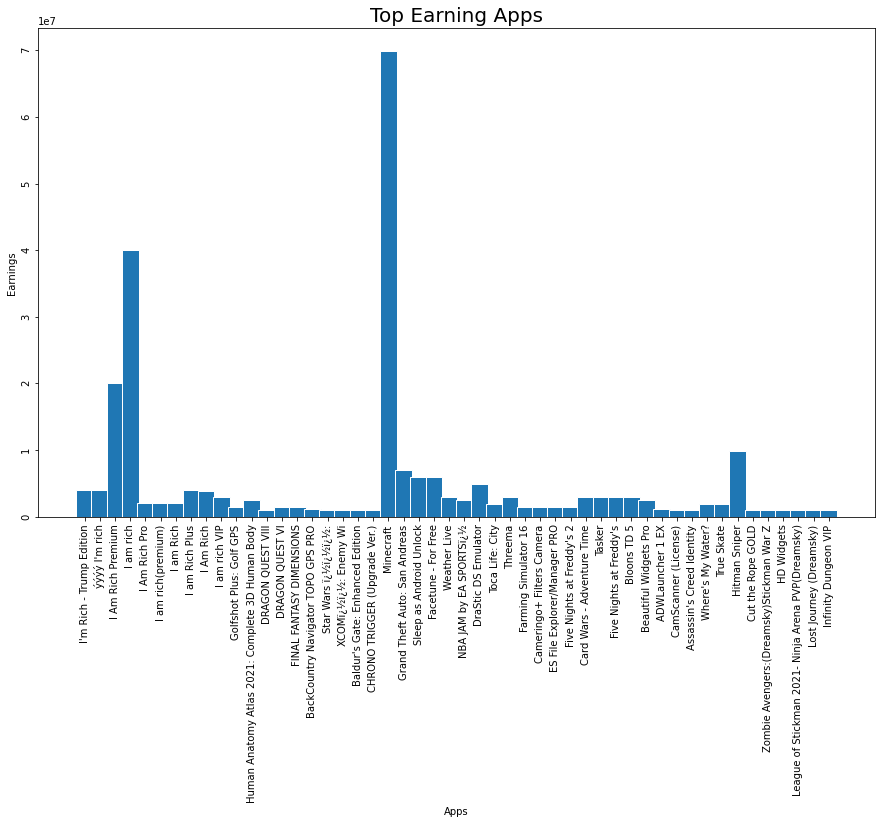

In [275]:

plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings,edgecolor='white')
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title('Top Earning Apps',size = 20);

**Inference:**

Of all the paid applications, Minecraft is the highest earning application because of its versatility, creativity and quirky graphics with which it attracts more users.

**3.Range in which most application Reviews lie**

Text(0.5, 1.0, 'Distribution of Rating')

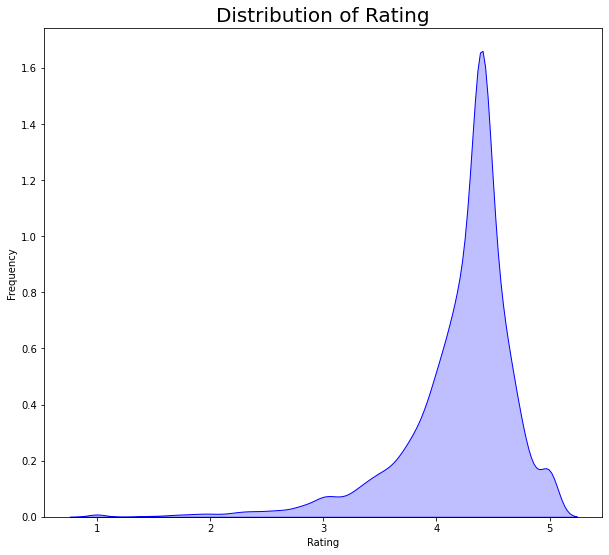

In [276]:
fig = plt.figure(figsize=(10,9)) 
graph = sns.kdeplot(df.Rating, color="blue", shade = True)
graph.set_xlabel("Rating")
graph.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

**Inference:**
From the graph, it is inferred that majority of the applications are rated between 4.0 and 4.5. This indicates that majority of applications are user satisfactory. The applications with ratings below 3.5 are not upto to the users expectations.

**4.Distribution Of paid and free applications in Play Store**

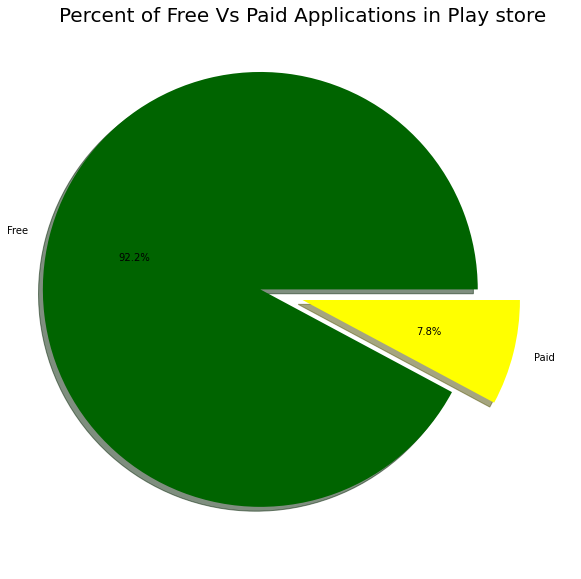

In [277]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["darkgreen","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Applications in Play store',size = 20)
plt.show()

**Inference:**

This chart tells us that majority of users prefer free applications over paid applications as they do not wish to spend money to access these applications.

Moreover, most of the paid applications are expensive due to which many of the users cannot afford them. Hence, they are lesser in count than that of free applications.


**5.To know number of applications that are free and paid in each category**

In [278]:
arr=np.array(['Free', 'Paid'], dtype=object)

Category           Type
ART_AND_DESIGN     Free     61
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
BEAUTY             Free     53
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    159
                   Paid      4
WEATHER            Free     71
                   Paid      8
Name: Type, Length: 63, dtype: int64


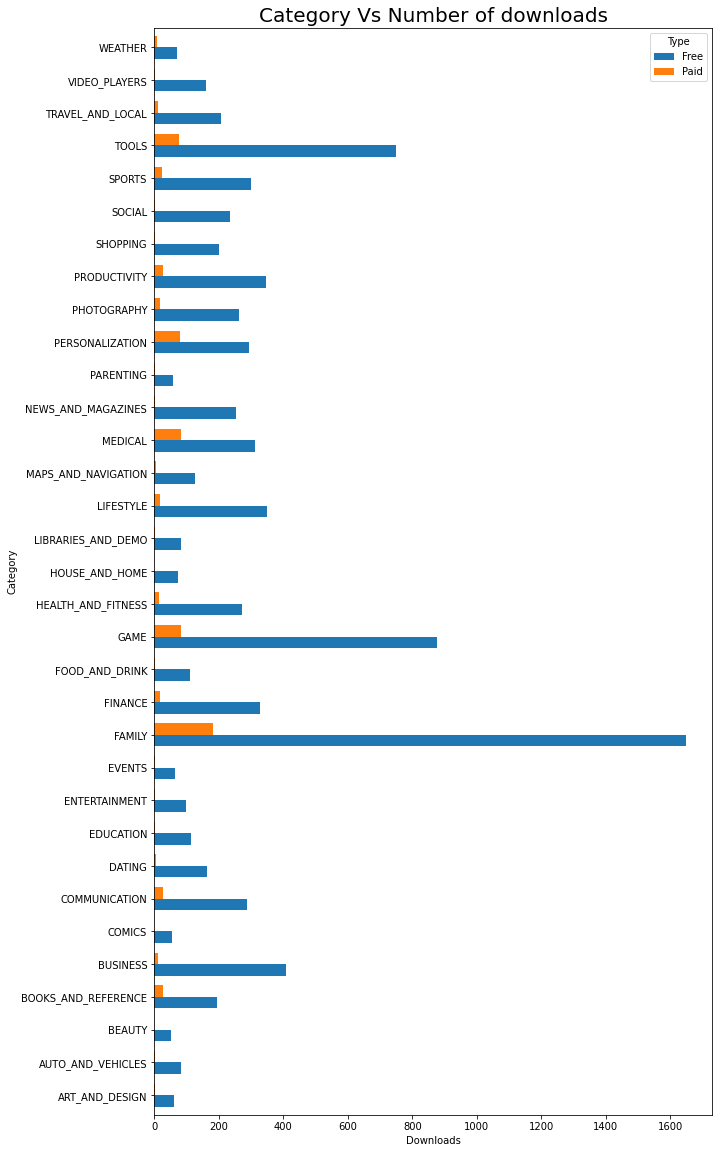

In [279]:
print(df.groupby('Category')['Type'].value_counts())
Type_cat = df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.xlabel("Downloads")
plt.title('Category Vs Number of downloads',size = 20);
plt.show()

**Inference:**


With 183 paid applications, Family is the category with the highest number of paid applications 
With 1647 free applications It is also the category with the highest number of free applications 
With 876 and 749 free applications respectively, the Game and Tools stand next to the Family with respect to number of free applications.




**6.To know which category has the highest number of downloads in Play Store**

In [280]:
downloads = df.groupby('Category')[['Downloads']].sum().sort_values(by='Downloads', ascending=False)

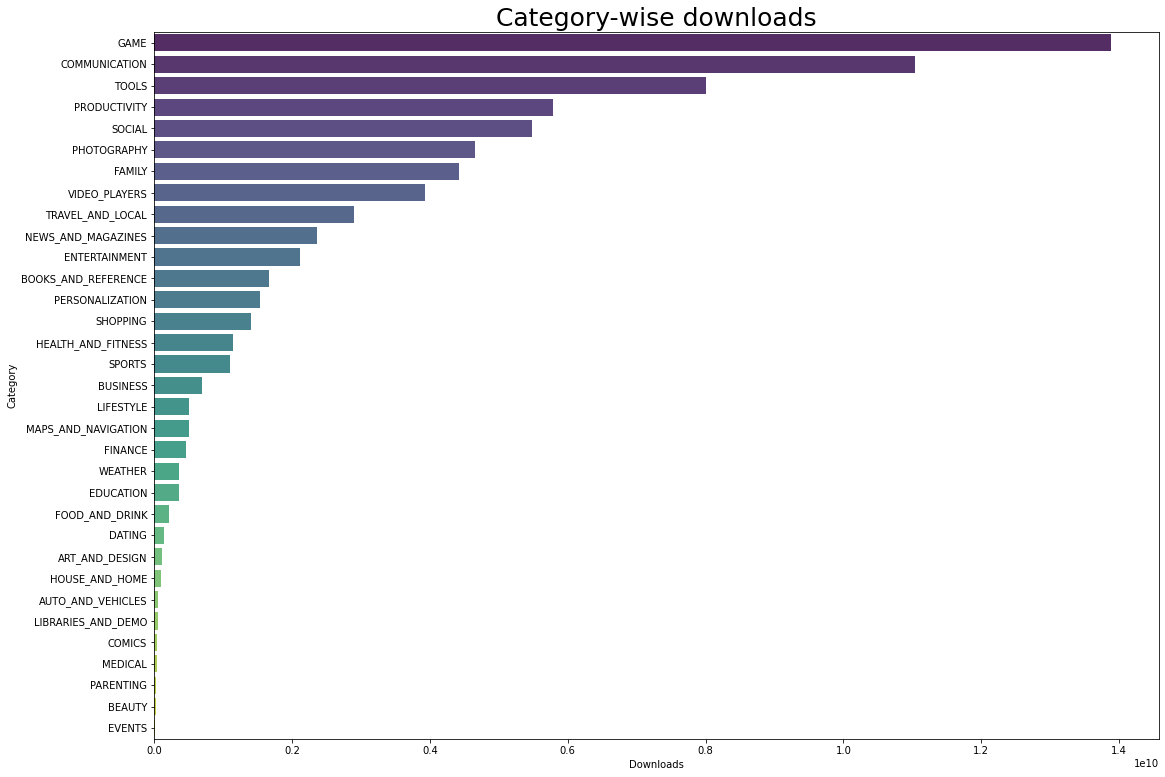

In [281]:
x2sis = []
y2sis = []

for i in range(len(downloads)):
    x2sis.append(downloads.Downloads[i])
    y2sis.append(downloads.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Downloads")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Category-wise downloads", fontsize = 25);

**Inference:**

When it comes to the number of downloads, the category 'Game' acquires the first position 
and can be called as the highest downloaded category. 


It is then followed by 
Communication, Tools, Productivity, and Social.


**This shows that majority of users are interested in Gaming category.**


It's more likely that users might range between **teenagers to mid 20s**. 


Very minimum downloads has been from the category Events.

**7.To know relation between Category and the count of application**

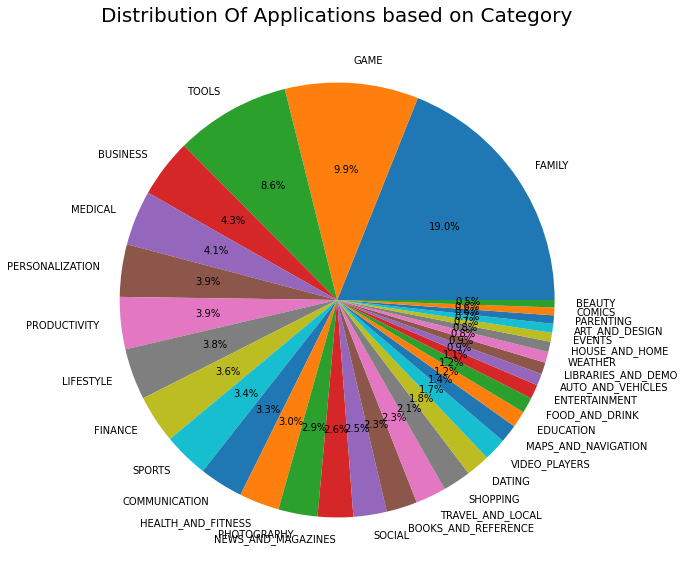

FAMILY                 1830
GAME                    958
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [282]:
plt.figure(figsize=(10,10))
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().keys(),autopct='%0.1f%%')
plt.title('Distribution Of Applications based on Category',size = 20)
plt.show()
df['Category'].value_counts()

**Inferences:**

This chart displays all the categories, partitioned according to the proportions 
of their quantity.

Top 5 categories based on highest application count

In [283]:
df['Category'].value_counts().head()

FAMILY      1830
GAME         958
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

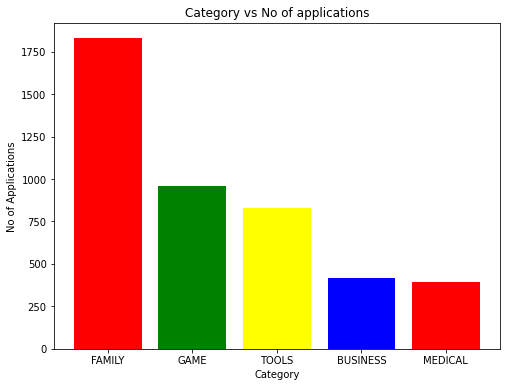

In [284]:
plt.figure(figsize=(8,6))
plt.bar(df['Category'].value_counts()[0:5].keys(),df['Category'].value_counts()[0:5],color=['red','green','yellow','blue'])
plt.title("Category vs No of applications")
plt.xlabel("Category")
plt.ylabel("No of Applications")
plt.show()

Inference:

The category ‘Family’ has the most number of applications as in majority of households, there will be at least one kid and many users use it. More active mobile users are the youngsters and they are interested in playing games, so it contains the second largest number of applications. Next are the categories of Tools, finance and lifestyle.


Ratings of applications that have the highest number reviews fro the highest count applications

CATEGORY: FAMILY 

In [285]:

fam=df[df['Category']=='FAMILY']
fam=fam.sort_values(by=['Rating'])
fam=fam.tail()
fam.iloc[::-1].loc[:, ['App', 'Rating']].style.hide_index()


App,Rating
Fr. Mike Schmitz Audio Teachings,5.000000
Safe Santa Fe,5.000000
BM SPM Practice,5.000000
WPBS-DT,5.000000
COMSATS BOOK STORE FOR BS(CS),5.000000


CATEGORY: GAME

In [286]:
game=df[df['Category']=='GAME']
game=game.sort_values(by=['Rating'])
game=game.tail()
game.iloc[::-1].loc[:, ['App', 'Rating']].style.hide_index()

App,Rating
Axe Champs! Wars,5.000000
Mad Dash Fo' Cash,5.000000
Santa's Monster Shootout DX,5.000000
211:CK,5.000000
Ra Ga Ba,5.000000


CATEGORY: TOOLS

In [287]:
tools=df[df['Category']=='TOOLS']
tools=tools.sort_values(by=['Rating'])
tools=tools.tail()
tools.iloc[::-1].loc[:, ['App', 'Rating']].style.hide_index()

App,Rating
CZ Kompas,5.000000
CE Smart,5.000000
CR Tracker for Chests,5.000000
CL REPL,5.000000
BM speed test,5.000000


CATEGORY: PRODUCTIVITY

In [288]:

prod=df[df['Category']=='PRODUCTIVITY']
prod=prod.sort_values(by=['Rating'])
prod=prod.tail()
prod.iloc[::-1].loc[:, ['App', 'Rating']].style.hide_index()

App,Rating
EB Scanner,5.000000
BV Mobile Apps,5.000000
DL Image Manager,5.000000
Ek Vote,5.000000
CJ'S TIRE AND AUTO INC.,5.000000


CATEGORY: FINANCE

In [289]:
fin=df[df['Category']=='FINANCE']
fin=fin.sort_values(by=['Rating'])
fin=fin.tail()
fin.iloc[::-1].loc[:, ['App', 'Rating']].style.hide_index()

App,Rating
DN Calculators,5.000000
BI APP,5.000000
"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",5.000000
CT Checkout,5.000000
CF,5.000000


#Prediction

**1. For given number of reviews, size of the applications, number of downloads predict the Rating of the application**

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [291]:
x = df[['Downloads', 'Reviews','Size']]
y = df['Rating']
x_test,x_train,y_test,y_train=train_test_split(x,y)
lr=LinearRegression()

In [292]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

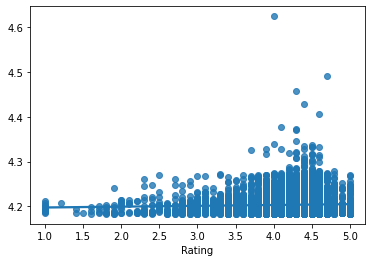

In [293]:
sns.regplot(y_test,y_pred,data=df)

In [294]:
from sklearn.metrics import mean_squared_error

In [295]:
mean_squared_error(y_pred,y_test)

0.24563064314826838

In [296]:
PredictRating = lr.predict([[500000, 1000,20]])
print(PredictRating)

[4.20027022]


#--------Conclusion---------